In [59]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/runchentao/Desktop/CMPE 188 Team Project/file_name.csv')
data

,Unnamed: 0,0,1,2,3,4,5
0,0,DATE,PARTICULARS,Memo,WITHDRAW,DEPOSIT,BALANCE
1,1,01-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,319.08
2,2,01-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,219.08
3,3,01-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,119.08
4,4,01-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,19.08
5,5,02-Jan-2019,Salary,SJSU Pay Roll,0.00,"10,103.66","10,122.74"
6,6,02-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,"10,022.74"
7,7,02-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,"9,922.74"
8,8,03-Jan-2019,Shopping,Amazon,"9,500.00",0.00,422.74
9,9,07-Jan-2019,Salary,SJSU Pay Roll,0.00,"6,490.89","6,913.63"


In [60]:
data.fillna("", inplace= True)
data.columns = ['Transation_ID', 'Category', 'Type', 'Memo' , 'Withdraw', 'Deposit', 'Balance']
data = data.drop(0)
data

,Transation_ID,Category,Type,Memo,Withdraw,Deposit,Balance
1,1,01-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,319.08
2,2,01-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,219.08
3,3,01-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,119.08
4,4,01-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,19.08
5,5,02-Jan-2019,Salary,SJSU Pay Roll,0.00,"10,103.66","10,122.74"
6,6,02-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,"10,022.74"
7,7,02-Jan-2019,Chase ATM,ATM Withdrawal,100.00,0.00,"9,922.74"
8,8,03-Jan-2019,Shopping,Amazon,"9,500.00",0.00,422.74
9,9,07-Jan-2019,Salary,SJSU Pay Roll,0.00,"6,490.89","6,913.63"
10,10,07-Jan-2019,Shopping,eBay,"6,000.00",0.00,913.63


In [81]:
col = ['Type', 'Memo']
df = data[col]
df.columns=['Category', 'Memo']
df

,Category,Memo
1,Chase ATM,ATM Withdrawal
2,Chase ATM,ATM Withdrawal
3,Chase ATM,ATM Withdrawal
4,Chase ATM,ATM Withdrawal
5,Salary,SJSU Pay Roll
6,Chase ATM,ATM Withdrawal
7,Chase ATM,ATM Withdrawal
8,Shopping,Amazon
9,Salary,SJSU Pay Roll
10,Shopping,eBay


In [82]:
df.insert(2, 'category_id', df['Category'].factorize()[0])
df

,Category,Memo,category_id
1,Chase ATM,ATM Withdrawal,0
2,Chase ATM,ATM Withdrawal,0
3,Chase ATM,ATM Withdrawal,0
4,Chase ATM,ATM Withdrawal,0
5,Salary,SJSU Pay Roll,1
6,Chase ATM,ATM Withdrawal,0
7,Chase ATM,ATM Withdrawal,0
8,Shopping,Amazon,2
9,Salary,SJSU Pay Roll,1
10,Shopping,eBay,2


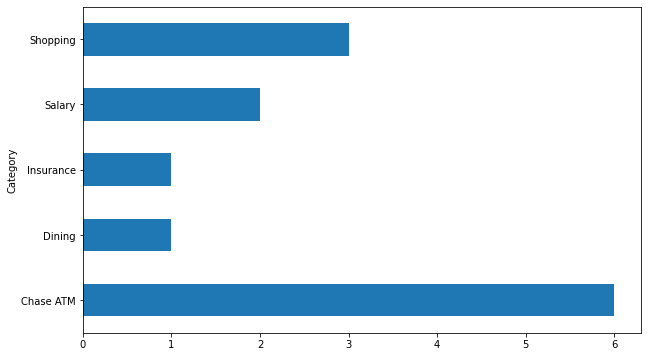

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
df.groupby('Category').Memo.count().plot.barh(ylim=0)
plt.show()

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Memo).toarray()
labels = df.category_id
features.shape

(13, 13)

In [111]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Chase ATM':
  . Most correlated unigrams:
. atm
. withdrawal
  . Most correlated bigrams:
. sjsu pay
. atm withdrawal
# 'Dining':
  . Most correlated unigrams:
. withdrawal
. doordash
  . Most correlated bigrams:
. sjsu pay
. atm withdrawal
# 'Insurance':
  . Most correlated unigrams:
. withdrawal
. geico
  . Most correlated bigrams:
. sjsu pay
. atm withdrawal
# 'Salary':
  . Most correlated unigrams:
. roll
. sjsu
  . Most correlated bigrams:
. pay roll
. sjsu pay
# 'Shopping':
  . Most correlated unigrams:
. ebay
. nike
  . Most correlated bigrams:
. sjsu pay
. atm withdrawal


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Memo'], df['Category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [120]:
print(clf.predict(count_vect.transform(["Nike shoes"])))

['Shopping']
